# 必要なライブラリをimport

In [1]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 3D-PCRの変数を定義

In [2]:
sample_size = (12, 8, 10)
lambda_param = 200

## 実際のデータを使う用

In [67]:
mode = 'real data'
c_prime_x = [(2, 0), (5, 1)]
c_prime_y = [(1, 0), (2, 1)]
c_prime_z = [(0, 1), (2, 0)]

# c_prime_x = [(1, 0)]
# c_prime_y = [(1, 0)]
# c_prime_z = [(0, 0)]

candidates = list(itertools.product(c_prime_x, c_prime_y, c_prime_z))

re_test = [candidate for candidate in candidates if candidate[0][1] == candidate[1][1] == candidate[2][1]]
re_test_dict = {re_test_y[0]+re_test_x[0]*sample_size[1]+sample_size[0]*sample_size[1]*re_test_z[0]: re_test_x[1] for re_test_x, re_test_y, re_test_z in re_test}
re_test_index = re_test_dict.keys()

In [70]:
re_test

[((2, 0), (1, 0), (2, 0)), ((5, 1), (2, 1), (0, 1))]

# 可視化

## positiveなsampleの位置を可視化

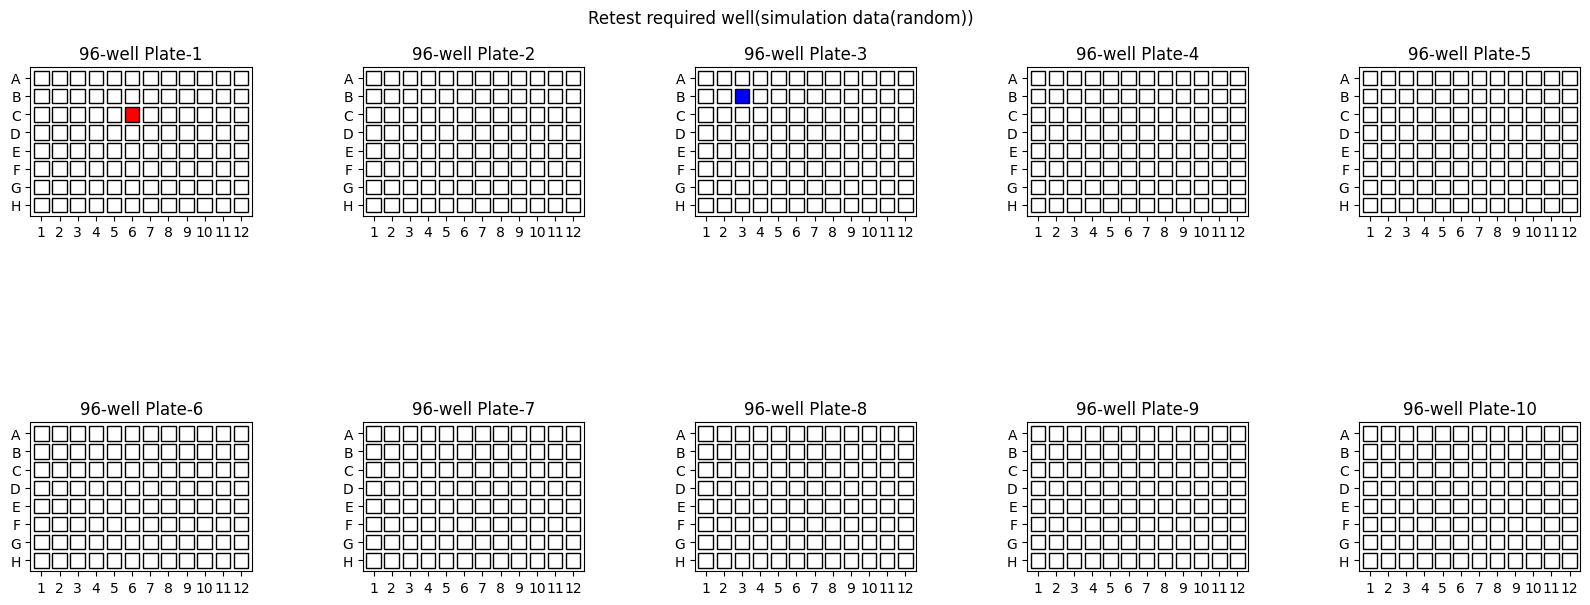

In [69]:
mode = 'simulation data(random)'
color_list = ['blue', 'red', 'green', 'yellow']
fig = plt.figure(figsize=(20, 20))
cnt = 0

for well_number in range(sample_size[2]):
    ax = fig.add_subplot(2, 5, well_number+1)
    well_size = 0.8
    
    for i in range(sample_size[0]):
        for j in range(sample_size[1]):
            if cnt in re_test_index:
                color = color_list[re_test_dict[cnt]]
            else:
                color = 'white'
            rect = patches.Rectangle((i+0.1, 7-j+0.1), well_size, well_size, linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

            cnt += 1
    
    ax.set_xticks([i + 0.5 for i in range(12)])
    ax.set_xticklabels([str(i + 1) for i in range(12)])
    
    ax.set_yticks([i + 0.5 for i in range(8)])
    ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'][::-1])  # Y軸のラベルは逆順
    
    ax.set_xlim(-0.1, 12.1)
    ax.set_ylim(-0.1, 8.1)
    
    ax.set_aspect('equal', 'box')
    
    ax.set_title(f'{sample_size[0] * sample_size[1]}-well Plate-{well_number+1}')

fig.suptitle(f'Retest required well({mode})', y=0.65)
fig.subplots_adjust(wspace=0.5, hspace=-0.7)